In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_table = pd.read_csv('./dataset/2.Translation_Test/test_table.csv')
user_table = pd.read_csv('./dataset/2.Translation_Test/user_table.csv')

test_table['date'] = pd.to_datetime(test_table['date'])

In [3]:
table = test_table.merge(user_table, on='user_id', how='left')
table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


## Test table

In [4]:
test_table.info()
test_table.head()
test_table.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           453321 non-null  int64         
 1   date              453321 non-null  datetime64[ns]
 2   source            453321 non-null  object        
 3   device            453321 non-null  object        
 4   browser_language  453321 non-null  object        
 5   ads_channel       181877 non-null  object        
 6   browser           453321 non-null  object        
 7   conversion        453321 non-null  int64         
 8   test              453321 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 31.1+ MB


,user_id,date,conversion,test
count,453321.000000,453321,453321.000000,453321.000000
mean,499937.514728,2015-12-02 08:56:07.976334336,0.049579,0.476446
min,1.000000,2015-11-30 00:00:00,0.000000,0.000000
25%,249816.000000,2015-12-01 00:00:00,0.000000,0.000000
50%,500019.000000,2015-12-03 00:00:00,0.000000,0.000000
75%,749522.000000,2015-12-04 00:00:00,0.000000,1.000000
max,1000000.000000,2015-12-04 00:00:00,1.000000,1.000000
std,288665.193436,NaN,0.217073,0.499445


In [5]:
# don't know what to fill
test_table['ads_channel'] = test_table['ads_channel'].fillna('NA')

- NA in `ads_channel` means user doesn't come from an ad

In [6]:
# count how many user_id in test_table
nunique_user_id = test_table['user_id'].nunique()
print('duplicate user_id in test_table:', test_table.shape[0] - nunique_user_id)

duplicate user_id in test_table: 0


- Experiment variants are all unique

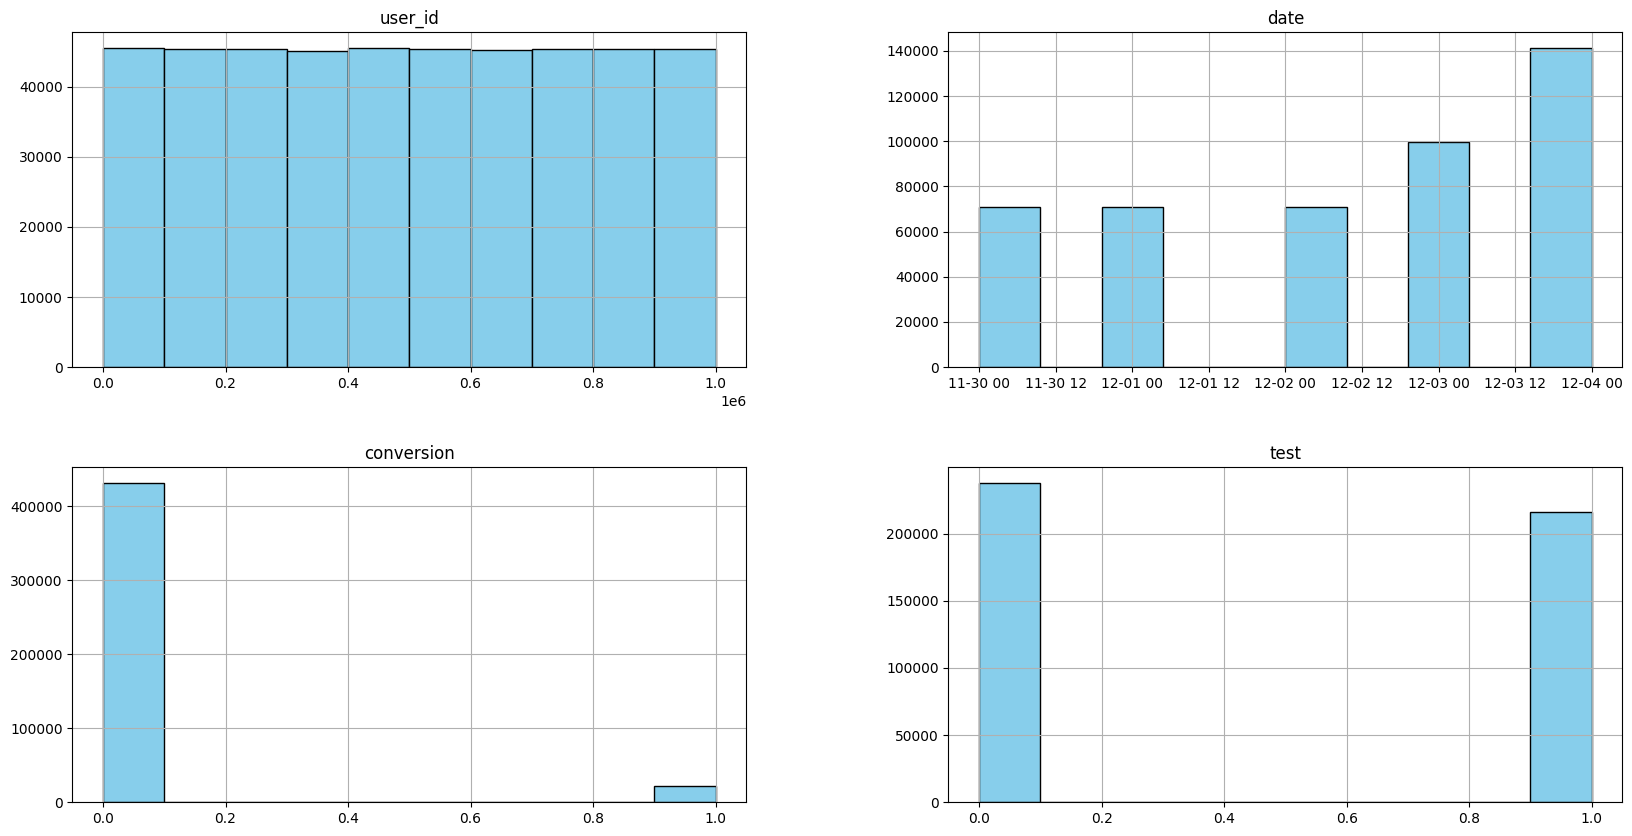

In [7]:
# plot histogram on all features
test_table.hist(edgecolor='black', color='skyblue', figsize=(20, 10))
plt.show()

- Experiment runs on 5 days only
- Roughly equal split between treatment (1) and control (0)

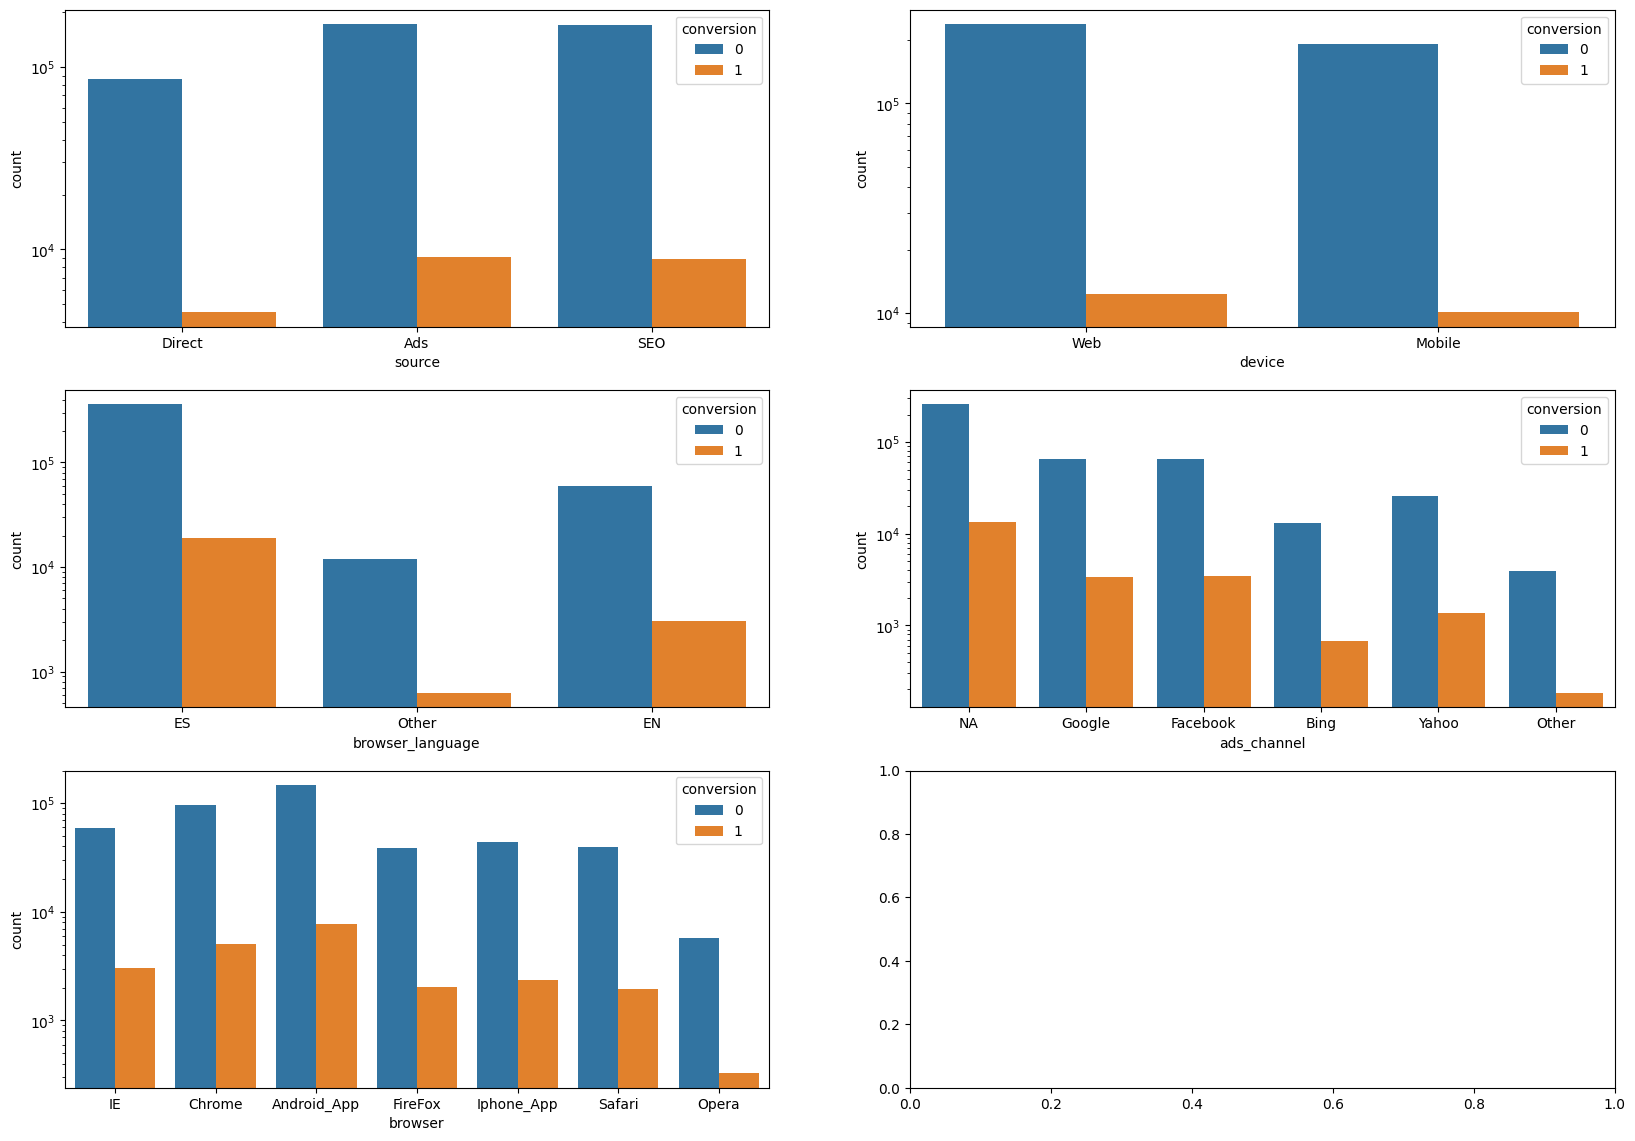

In [8]:
# put multiple sns countplot in one figure
cates = ['source', 'device', 'browser_language', 'ads_channel', 'browser']
fig, ax = plt.subplots(3, 2, figsize=(20, 14))

for i, cate in enumerate(cates):
    sns.countplot(x=cate, hue='conversion', data=test_table, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_yscale('log')
plt.show()

## User table

In [9]:
user_table.info()
user_table.head()
user_table.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [10]:
table

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
453316,425010,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0,M,50.0,Mexico
453317,826793,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1,F,20.0,Colombia
453318,514870,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,M,25.0,Spain
453319,785224,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,1,M,21.0,Colombia


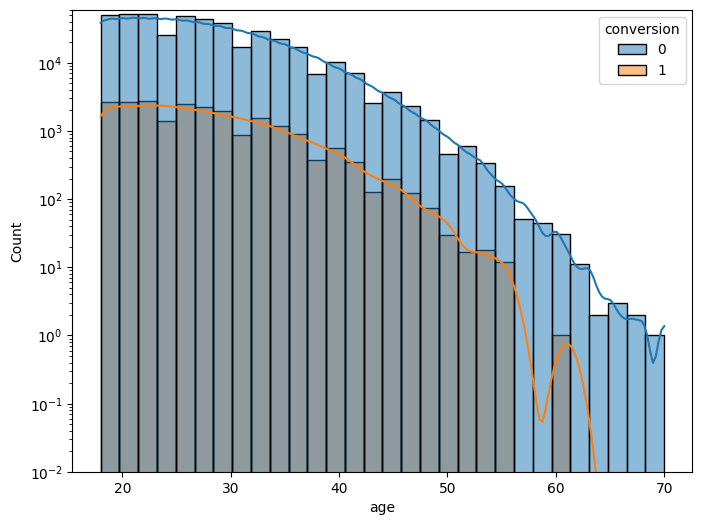

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=table, x='age', hue='conversion', bins=30, kde=True)
plt.ylim(0.01, 60000)
plt.yscale('log')
plt.show()

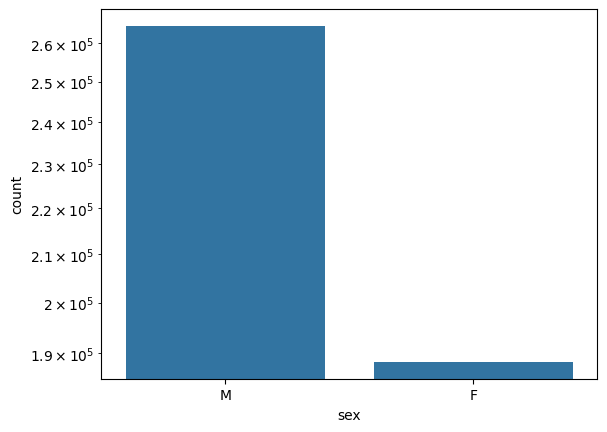

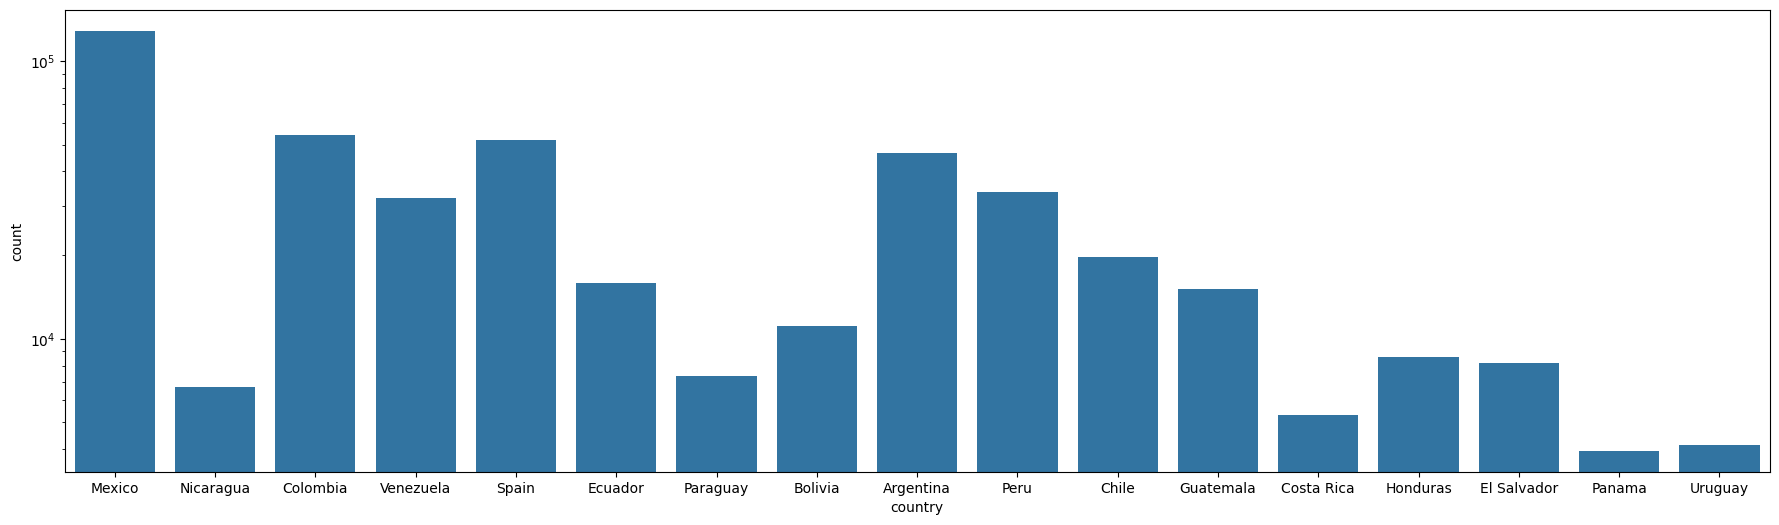

In [12]:
# put multiple sns countplot in one figure
sns.countplot(x='sex', data=user_table)
plt.yscale('log')
plt.show()

plt.figure(figsize=(22, 6))
sns.countplot(x='country', data=user_table)
plt.yscale('log')
plt.show()

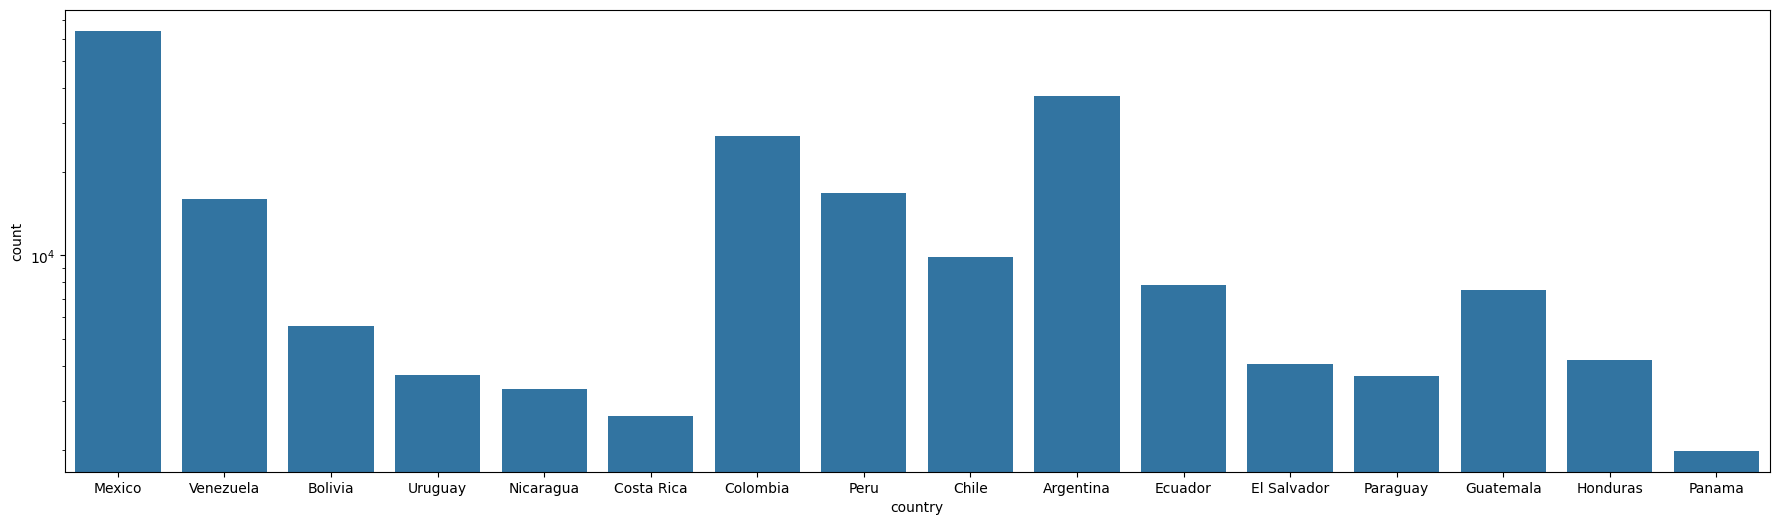

In [13]:
# find the distribution of country of user that is tested
test_country = test_table.merge(user_table, on='user_id', how='left')
test_country = test_country[test_country['test'] == 1] # user in treatment group
plt.figure(figsize=(22, 6))
sns.countplot(x='country', data=test_country)
plt.yscale('log')
plt.show()

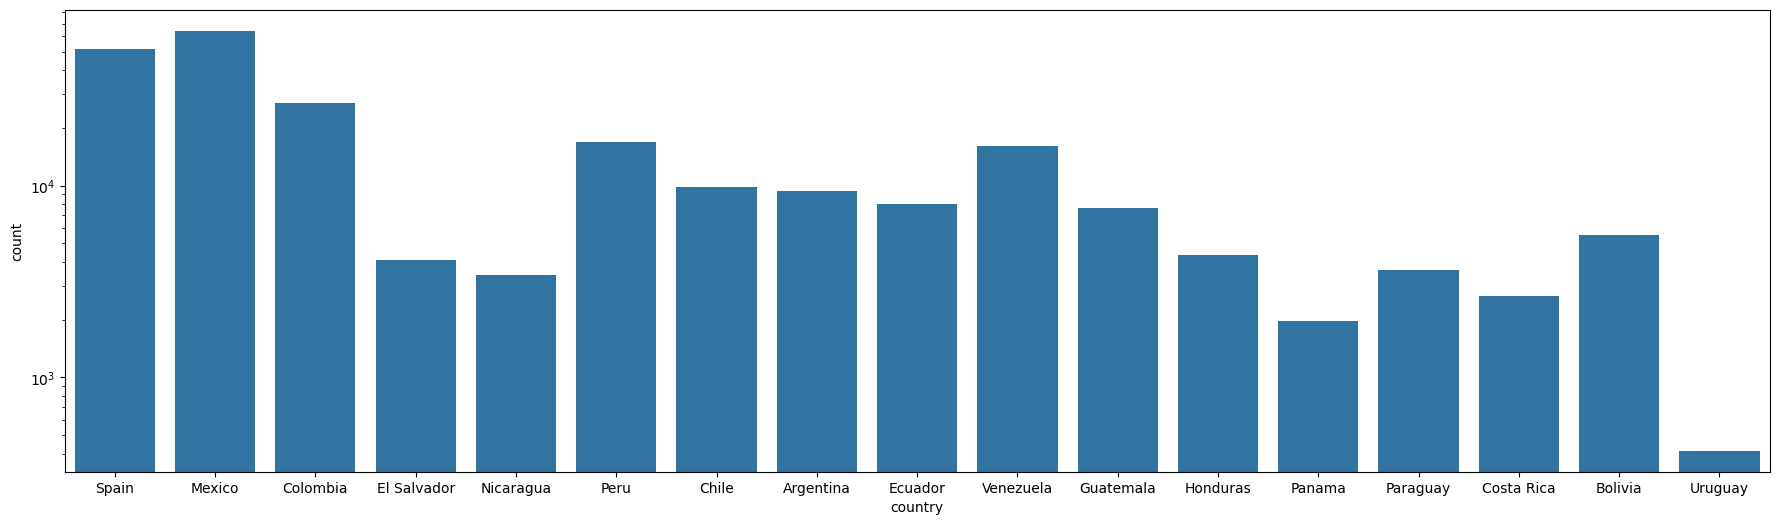

In [14]:
test_country = test_table.merge(user_table, on='user_id', how='left')
test_country = test_country[test_country['test'] == 0] # user in control group
plt.figure(figsize=(22, 6))
sns.countplot(x='country', data=test_country)
plt.yscale('log')
plt.show()

## AB test

In [21]:
from scipy.stats import ttest_ind

In [42]:
data = table.copy()
data = data[data['country'] != 'Spain']
data

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
453315,783089,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,F,20.0,Mexico
453316,425010,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0,M,50.0,Mexico
453317,826793,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1,F,20.0,Colombia
453319,785224,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,1,M,21.0,Colombia


In [43]:
variants = data['test'].to_numpy() # 0=control, 1=test
results = data['conversion'].to_numpy() # 0=not converted, 1=converted
assert len(variants) == len(results)

In [45]:
# equvalant to df[df['test'] == 1]
control, treatment = [], []
for v, o in zip(variants, results):
    if v == 0:
        control.append(o)
    else:
        treatment.append(o)

control, treatment = np.array(control), np.array(treatment)
c_mean, c_std = np.mean(control), np.std(control)
t_mean, t_std = np.mean(treatment), np.std(treatment)
print('\t\tmean, std')
print('control', c_mean, c_std)
print('treatment', t_mean, t_std)

t_stat, p_val = ttest_ind(control, treatment, equal_var=False)
print('t-statistic:', t_stat)
print('p-value:', p_val)

		mean, std
control 0.04833042316066309 0.21446350122520688
treatment 0.043424713982118966 0.20381120724260995
t-statistic: 7.3939374121344805
p-value: 1.4282994754055316e-13


Reject H0, ie the localization make it worse

$x$ is the conversion rate, follow normal distribution
$$
\begin{align}
\bar{x_c} &\sim N\left(\mu_c, {\sigma_c \over \sqrt{n_c}}\right)\\
\bar{x_t} &\sim N\left(\mu_t, {\sigma_t \over \sqrt{n_t}}\right)
\end{align}
$$

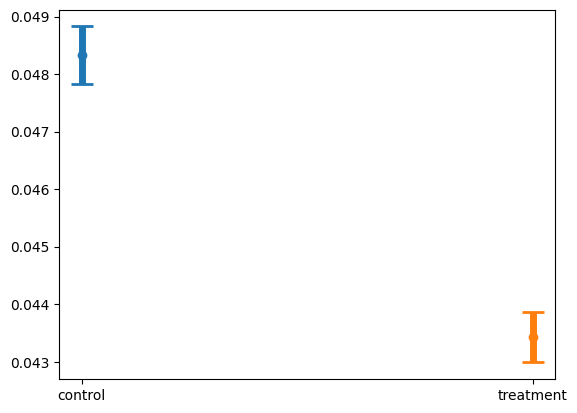

In [46]:
plt.errorbar('control', c_mean, yerr=c_std/np.sqrt(len(control)), fmt='o', label='control', capsize=8, capthick=2, lw=5)
plt.errorbar('treatment', t_mean, yerr=t_std/np.sqrt(len(treatment)), fmt='o', label='treatment', capsize=8, capthick=2, lw=5)
plt.show()

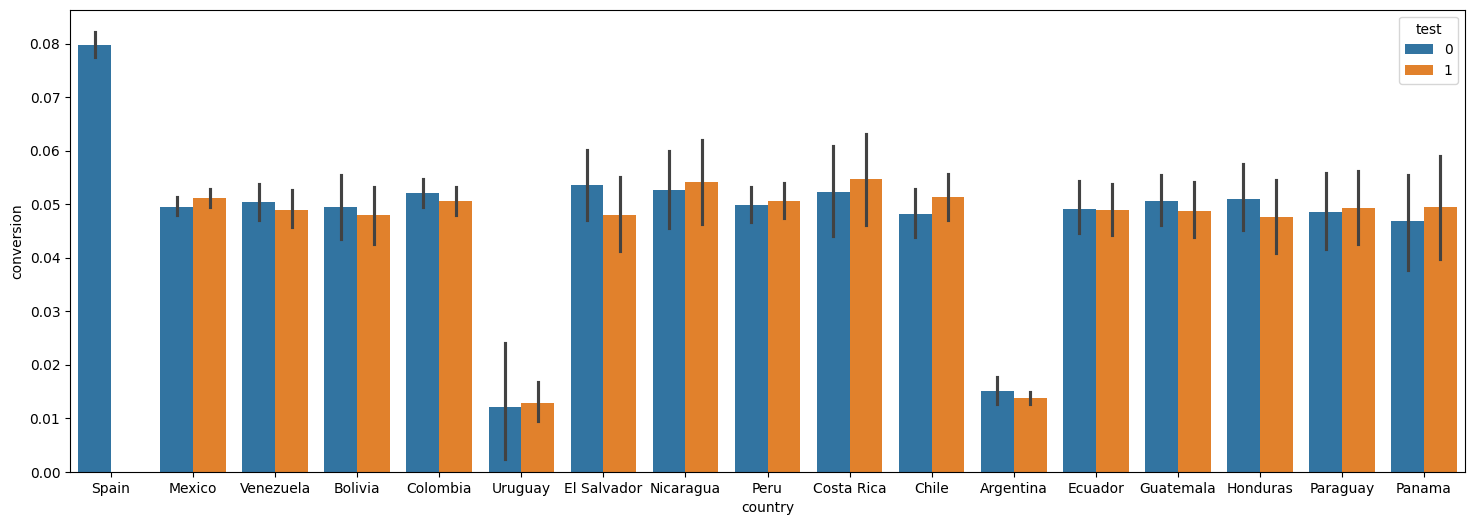

In [18]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', hue='test', data=table, ax=ax)
plt.show()

From this we can also see the difference is not significant

### per country

In [ ]:
def abtest(table, country):
    if country == 'Spain' or country is None: return None
    table_country = table[table['country'] == country]
    variants = table_country['test'].to_numpy()
    results = table_country['conversion'].to_numpy()

    control, treatment = [], []
    for v, o in zip(variants, results):
        if v == 0:
            control.append(o)
        else:
            treatment.append(o)

    control, treatment = np.array(control), np.array(treatment)
    c_mean, c_std = np.mean(control), np.std(control)
    t_mean, t_std = np.mean(treatment), np.std(treatment)
    t = ttest_ind(control, treatment, equal_var=False)

    c_std /= np.sqrt(len(control))
    t_std /= np.sqrt(len(treatment))
    return [c_mean, c_std, t_mean, t_std, country, t]

def abtests(table, countries):
    results = []
    for country in countries:
        r = abtest(table, country)
        if r is not None:
            results.append(r)
    return results

/home/wei-chih/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wei-chih/.local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/wei-chih/.local/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/wei-chih/.local/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/wei-chih/.local/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


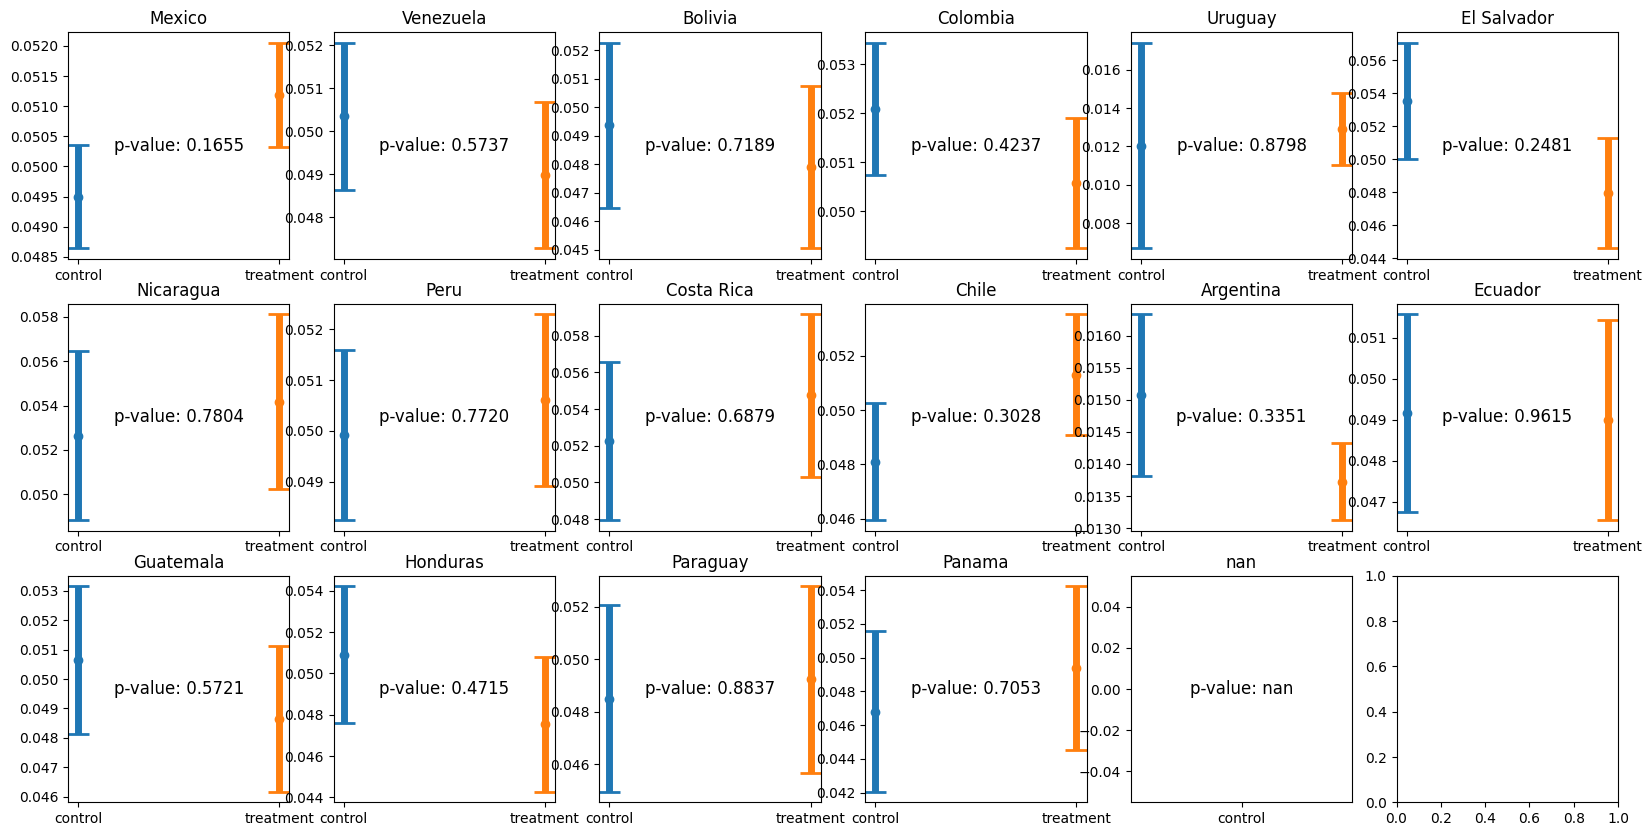

In [ ]:
table_local = table.copy()
table_local = table_local[table_local['browser_language'] == 'ES'] # should choose 'ES'
# table_local = table_local[table_local['source'] == 'SEO'] # 'Direct', 'Ads', 'SEO'
countries = table_local['country'].unique()
results = abtests(table_local, countries)

# plot in grid
fig, ax = plt.subplots(3, 6, figsize=(20, 10))
for i, result in enumerate(results):
    country, t = result[4], result[5]
    ax[i//6, i%6].errorbar('control', result[0], yerr=result[1], fmt='o', label='control', capsize=8, capthick=2, lw=5)
    ax[i//6, i%6].errorbar('treatment', result[2], yerr=result[3], fmt='o', label='treatment', capsize=8, capthick=2, lw=5)
    ax[i//6, i%6].set_title(country)
    ax[i//6, i%6].text(0.5, 0.5, f'p-value: {t.pvalue:.4f}', fontsize=12, ha='center',
                    va='center', transform=ax[i//6, i%6].transAxes)

plt.show()

Likewise, the difference in each country is not significant either
=> don't reject H0 => local is not worse than not local